In [21]:
import matplotlib.pyplot as plt
import networkx as nx
from numbers import Number

In [25]:
def plot_graph(edges, n, highlighted_edges=[]):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)
    
    pos = nx.spring_layout(G)  # Get positions of nodes for plotting

    # Draw all edges, lighter and dashed
    nx.draw_networkx_edges(G, pos, alpha=0.5, style="dashed")
    
    # Draw highlighted edges (like the MST), thicker and solid
    if highlighted_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, alpha=0.8, width=2, edge_color="b")

    # Draw nodes
    nx.draw_networkx_nodes(G, pos)

    # Draw labels
    nx.draw_networkx_labels(G, pos)
    edge_labels = {(u, v): w for u, v, w in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

In [7]:
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n)) # parent[i] = parent of i
        self.rank = [0] * n # rank[i] = rank of subtree rooted at i

    def find(self, u): # find the root of u
        if self.parent[u] != u: # if u is not the root of itself
            self.parent[u] = self.find(self.parent[u]) # set u's parent to the root of u's parent
        return self.parent[u] # return the root of u

    def union(self, u, v): # union of u and v
        rootU, rootV = self.find(u), self.find(v) # find the root of u and v
        if rootU != rootV: # if u and v are not already in the same set
            if self.rank[rootU] > self.rank[rootV]: # if u's rank is greater than v's rank
                rootU, rootV = rootV, rootU # swap u and v
            self.parent[rootV] = rootU # set u's root to v's root
            if self.rank[rootU] == self.rank[rootV]: # if u and v have the same rank
                self.rank[rootU] += 1 # increment u's rank by 1

In [26]:
def kruskals(n, edges):
    plot_graph(edges, n)  # Plot the original graph
    edges.sort(key=lambda x: x[2])  # sort edges by weight
    uf = UnionFind(n) # initialize union-find data structure, used to detect cycles
    mst = [] # list of edges in the MST
    for u, v, w in edges: # iterate over edges in increasing order of weight
        if uf.find(u) != uf.find(v): # if u and v are not in the same connected component (i.e. adding edge (u, v) does not create a cycle)
            uf.union(u, v) # merge the connected components of u and v
            mst.append((u, v, w)) # add edge (u, v) to the MST
            plot_graph(edges, n, mst)  # Plot the current MST
            if len(mst) == n - 1:  # early exit if MST is complete
                break

    return mst

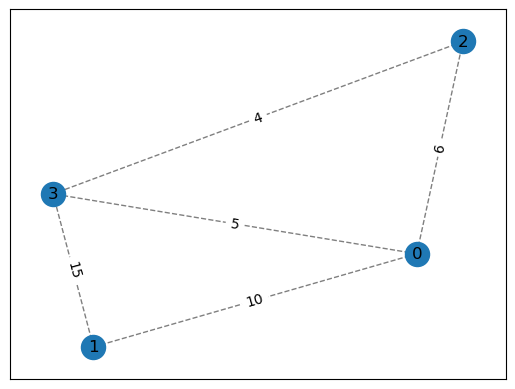

/tmp/ipykernel_17432/2483754132.py:14: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, alpha=0.8, width=2, edge_color="b")


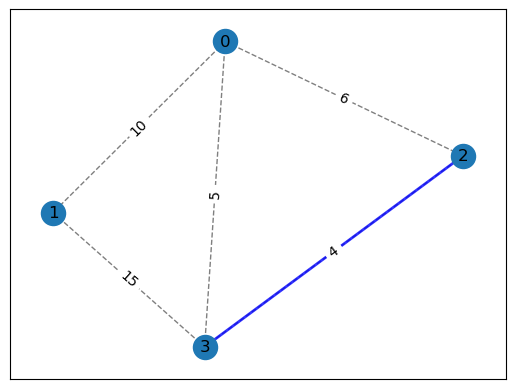

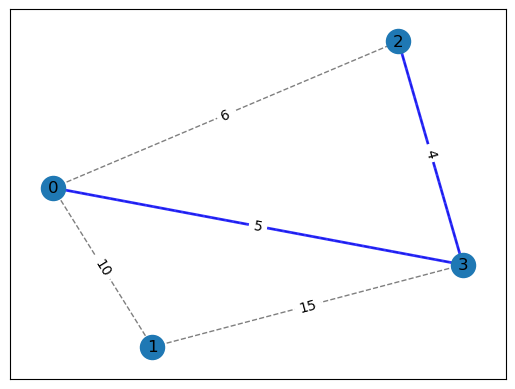

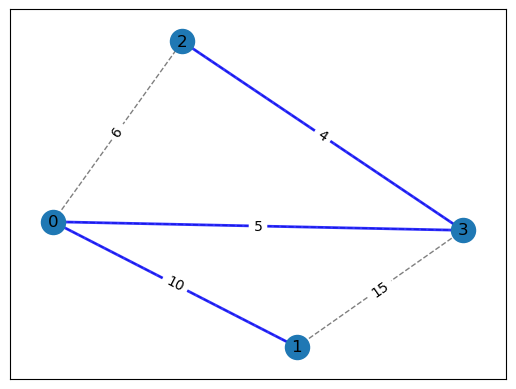

Edges in the Minimum Spanning Tree:
(2, 3, 4)
(0, 3, 5)
(0, 1, 10)


In [27]:
# Test with a simple graph
# 4 vertices, 5 edges
# Edge format: (vertex1, vertex2, weight)
edges = [(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)]
n = 4  # Total number of vertices in the graph
mst = kruskals(n, edges)
print("Edges in the Minimum Spanning Tree:")
for edge in mst:
    print(edge)